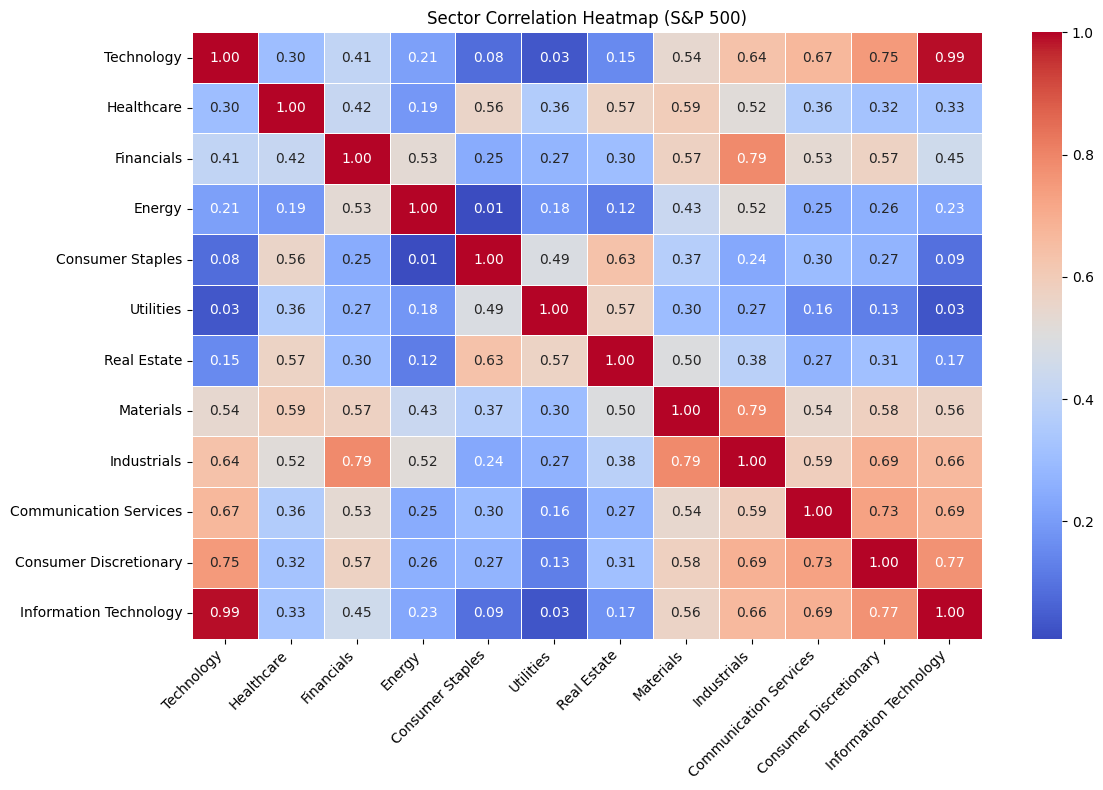

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sector ETFs
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Consumer Staples': 'XLP',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Materials': 'XLB',
    'Industrials': 'XLI',
    'Communication Services': 'XLC',
    'Consumer Discretionary': 'XLY',
    'Information Technology': 'VGT'
}

# Fetch historical data for all sector ETFs
data = {}
for sector, ticker in sector_etfs.items():
    data[sector] = yf.Ticker(ticker).history(period="6mo")['Close']

# Combine data into a single DataFrame
df = pd.DataFrame(data)

# Calculate daily percentage changes
returns = df.pct_change()

# Compute the correlation matrix
correlation_matrix = returns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns
)

# Customize the plot
plt.title('Sector Correlation Heatmap (S&P 500)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the heatmap
plt.show()
